<a href="https://colab.research.google.com/github/saraadastan/sara/blob/master/CuRW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://gitlab.synchrotron-soleil.fr/PA/collective-effects/mbtrack2.git

Cloning into 'mbtrack2'...
remote: Enumerating objects: 1364, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 1364 (delta 8), reused 0 (delta 0), pack-reused 1340
Receiving objects: 100% (1364/1364), 654.27 KiB | 1.38 MiB/s, done.
Resolving deltas: 100% (937/937), done.


In [2]:
%cd mbtrack2

/content/mbtrack2


In [3]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 8.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.4 MB 49.5 MB/s 
     |████████████████████████████████| 1.6 MB 41.7 MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp38-cp38-linux_x86_64.whl size=4438433 sha256=a9c874dacca9912326de00f2149a5791f3437590ba289797b5527a17e54c39b8
  Stored in directory: /root/.cache/pip/wheels/f3/35/48/0b9a7076995eea5ea64a7e4bc3f0f342f453080795276264e7
Successfully built mpi4py


In [4]:
import numpy as np
from mbtrack2.tracking import Synchrotron, Electron
from mbtrack2.utilities import Optics

In [5]:
#%%Elettra 2.0 parameters
h = 432 # Harmonic number of the accelerator.
L = 259.2 # Ring circumference in [m].
E0 = 2.4e9 # Nominal (total) energy of the ring in [eV].
particle = Electron() # Particle considered.
ac = 0.00013968121 # Momentum compaction factor.
U0 = 0.45021768 # Energy loss per turn in [eV].
tau = np.array([5.621e-3, 9.217e-3, 6.777e-3]) # Horizontal, vertical and longitudinal damping times in [s].
tune = np.array([32.27, 9.15]) # Horizontal and vertical tunes.
emit = np.array([2.2670e-10, 2.267e-12]) # Horizontal and vertical equilibrium emittance in [m.rad].
sigma_0 = 3.1152e-12 # Natural bunch length in [s].
sigma_delta = 1.9285e-3 # Equilibrium energy spread.
chro = [0.93, 2.43] # Horizontal and vertical (non-normalized) chromaticities.

local_beta = np.array([9.37, 2.004]) # Beta function at the tracking location.
local_alpha = np.array([0, 0]) # Alpha function at the tracking location.
local_dispersion = np.array([0, 0, 0, 0]) # Dispersion function and its derivative at the tracking location.
optics = Optics(local_beta=local_beta, local_alpha=local_alpha, 
                  local_dispersion=local_dispersion)

ring = Synchrotron(h=h, optics=optics, particle=particle, L=L, E0=E0, ac=ac, 
                   U0=U0, tau=tau, emit=emit, tune=tune, 
                   sigma_delta=sigma_delta, sigma_0=sigma_0, chro=chro)

In [6]:
from mbtrack2.tracking import Bunch

In [7]:
mybunch = Bunch(ring,  mp_number=1e5, current=2e-3)
mybunch.init_gaussian()

In [8]:
from mbtrack2.impedance import CircularResistiveWall
from mbtrack2.tracking import WakePotential

In [23]:
time = np.linspace(0, 10e-12, 10000) # Time points where the wake function will be evaluated in [s].
frequency = np.linspace(1e9, 100e9, 10000) # Frequency points where the impedance will be evaluated in [Hz].
length = ring.L # Beam pipe length in [m].
rho = 1.7e-8 # Effective resistivity to consider in [ohm.m] as in [1].
radius = 7.5e-3 # Beam pipe radius in [m].
exact = True # If False, approxmiated formulas are used for the wake function computations.

rw = CircularResistiveWall(time, frequency, length, rho, radius, exact)

In [24]:
rw.wake_components

array(['Wlong', 'Wxdip', 'Wydip'], dtype='<U5')

In [25]:
rw.Zydip.data

,real,imag
frequency [Hz],,
1.000000e+09,76444.544611,76444.544611
1.009901e+09,76068.893469,76068.893469
1.019802e+09,75698.726341,75698.726341
1.029703e+09,75333.911078,75333.911078
1.039604e+09,74974.319950,74974.319950
...,...,...
9.996040e+10,7645.968306,7645.968306
9.997030e+10,7645.589671,7645.589671
9.998020e+10,7645.211092,7645.211092


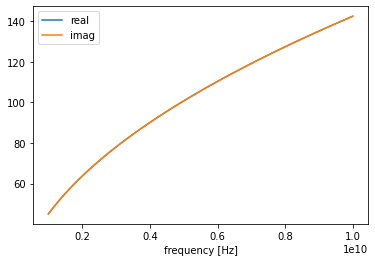

In [19]:
rw.Zlong.data.plot()

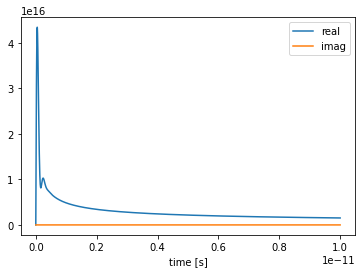

In [20]:
rw.Wydip.data.plot()

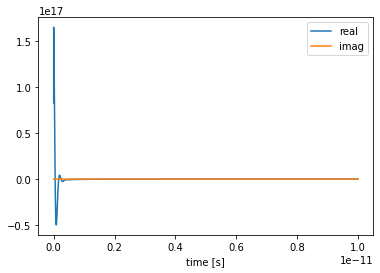

In [21]:
rw.Wlong.data.plot()